# **Project Name**    - **Hotel Booking Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - Sudipta Samanta

# **Project Summary -**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This project aims to create meaningful estimators from the data set we have and to perform Exploratory Data Analysis so that if anyone who wishes to proceed with the Machine Learning Model, can do so.

The data set used for this analysis was taken from AlmaBetter's Project Datasets. You can find great datasets to work with. AlmaBetter’s community comprises data scientists and machine learners from all over the world with various skills and backgrounds. You can find the dataset here: Hotel Booking Demand. This data set contains a single file that compares various booking information between two hotels: a city hotel and a resort hotel. Both hotels are located in Portugal (southern Europe) (“First One at the resort region and Second at the city of Lisbon”).

# **GitHub Link -**

https://github.com/sudipta-DS

# **Problem Statement**


Hotel industry is a very volatile industry and the bookings depend on variety of factors such as type of hotels, seasonality, days of week and many more. This makes analyzing the patterns available in the past data more important to help the hotels plan better. Using the historical data, hotels can perform various campaigns to boost the business.

#### **Define Your Business Objective?**

When running a successful and demanding hospitality business, most hotel owners like a hotel that is running at full capacity and bringing in sizeable revenue. Most of the time hotel booking cancellations can be hurtful to business owners; although sometimes there are genuine reasons for guests to do so. These last-minute cancellations can result in lost revenue unless some measures are undertaken to mitigate the loss. The purpose of this project is to analyze Hotel Bookings data, investigate cancellations, and their underlying patterns; and suggest measures that can be implemented to reduce cancellations and secure revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Sudipta/Hotel Bookings.csv')

### Dataset First View

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
n_rows = df.shape[0] # Code to get number of rows
n_cols = df.shape[1] # Code to get number of cols
print('Number of rows ',n_rows)
print('Number of cols ',n_cols)

Number of rows  119390
Number of cols  32


### Dataset Information

In [6]:
df.info() # Code to get a general in info about all columns(Non-Null values,Data Types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().value_counts() # Code to get No of unique values and and their number of occurences

False    87396
True     31994
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
null_value_count = list(df.isnull().sum().values)
df.isnull().sum()    ## Code to get number of null values columnwise

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

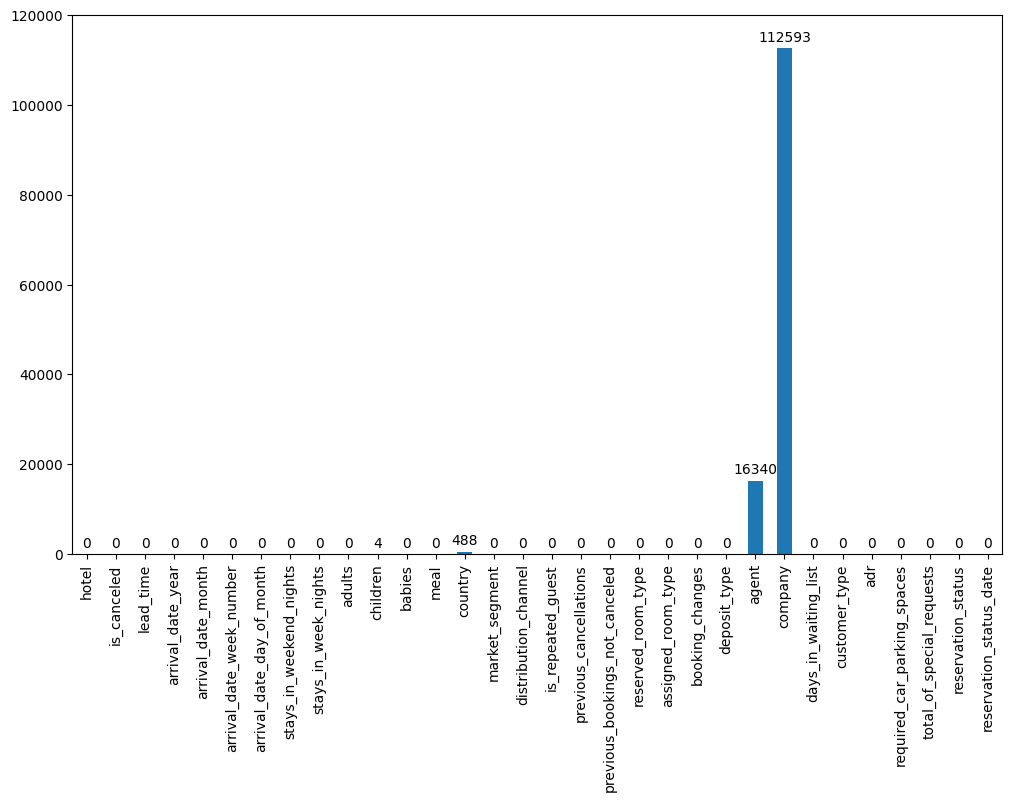

In [14]:
# Visualizing the missing values
plt.figure(figsize=(12,7))
df.isnull().sum().plot(kind='bar')
plt.ylim({0,120000})

y_coordinates = df.isnull().sum().values
x_coordinates = [i for i in range(df.shape[1])]
for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

### What did you know about your dataset?

Till now, we have seen -
* our dataset has 119390 rows and 32 columns initially. 
* In which 31994 rows are duplicated. 
* Four columns has null values which are children(4 NUll values),country(488 Null values),agent(16340 Null values),company(112593 Null values). 
* The column 'company' has maximum amount of null values.






## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [16]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 










- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.

-----------------------------------------------------------------------------

*   count - Total number of non-null values in each column
*   mean - Mean of each column
*   std - Standard Deviation of each column
*   min - Minimum value of each column
*  25% - First Quartile(Q1) of each column
*  50% - Second Quartile(Q2) or Median of each column
*   75% - Third Quartile(Q3) of each column
*   max - Maximum value of each column


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
temp = df.copy()

In [19]:
temp.drop(columns=['company'],axis=0,inplace=True)

In [20]:
temp.dropna(inplace=True)

In [21]:
temp.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?

We made manipulations like - 

*   Dropped the column 'company' which had 94% null values.
*   Dropped rows consists of Null values which might give wrong results.
*   Dropped Duplicate rows to reduce computational complexity.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

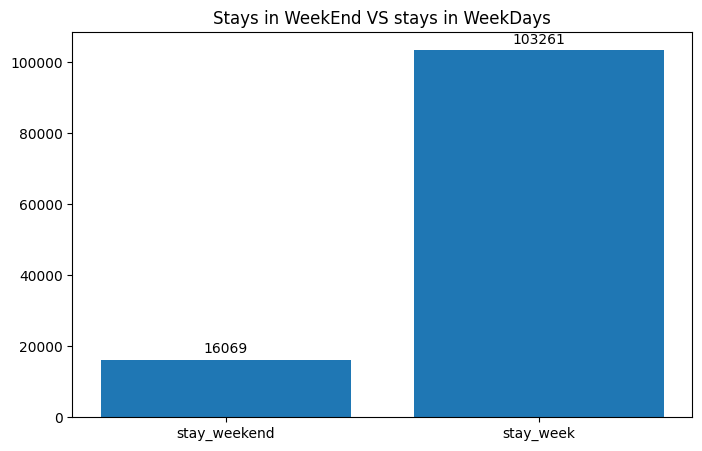

In [41]:
# Chart - 1 visualization code
stay_weekend = temp['stays_in_weekend_nights'].sum()//5
stay_week = temp['stays_in_week_nights'].sum()//2
y_coordinates = [stay_weekend,stay_week]
x_coordinates = [0,1]
plt.figure(figsize=(8,5))
p = plt.bar(x=['stay_weekend','stay_week'],height=[stay_weekend,stay_week])
for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Stays in WeekEnd VS stays in WeekDays')
plt.show()

##### 1. Why did you pick the specific chart?

I pick this Bar chart to understand whether we have more bookings on weekday or weekends.

##### 2. What is/are the insight(s) found from the chart?

We found stays in weekdays(206523) are much higher than stays in weekends(80345).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No I think there is no negative growth. Weekdays has more bookings may be because of office trips,corporate meetings etc.

#### Chart - 2

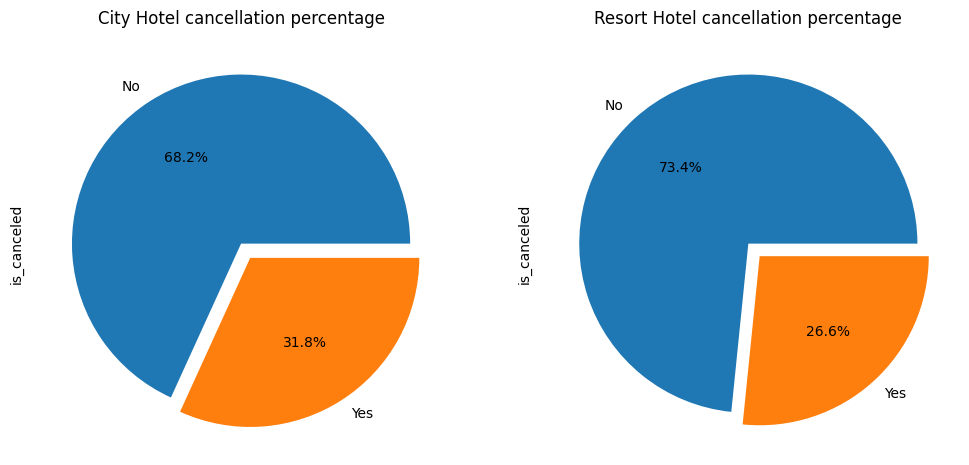

In [43]:
df_city_hotel = temp[temp['hotel']=='City Hotel']
df_resort_hotel = temp[temp['hotel']=='Resort Hotel']

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
explode= [0,0.1]
df_city_hotel['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode,ax=ax1,title='City Hotel cancellation percentage',labels=['No','Yes'])
df_resort_hotel['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode,ax=ax2,title='Resort Hotel cancellation percentage',labels=['No','Yes'])
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart to understand which hotel has more cancellations.

##### 2. What is/are the insight(s) found from the chart?

We found that city hotel has more cancellation percentage than Resort hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is giving us negative growth in our business .We need to focus on improving hotel infrastructure, give coupon codes , take feedbacks from customers etc.

#### Chart - 3

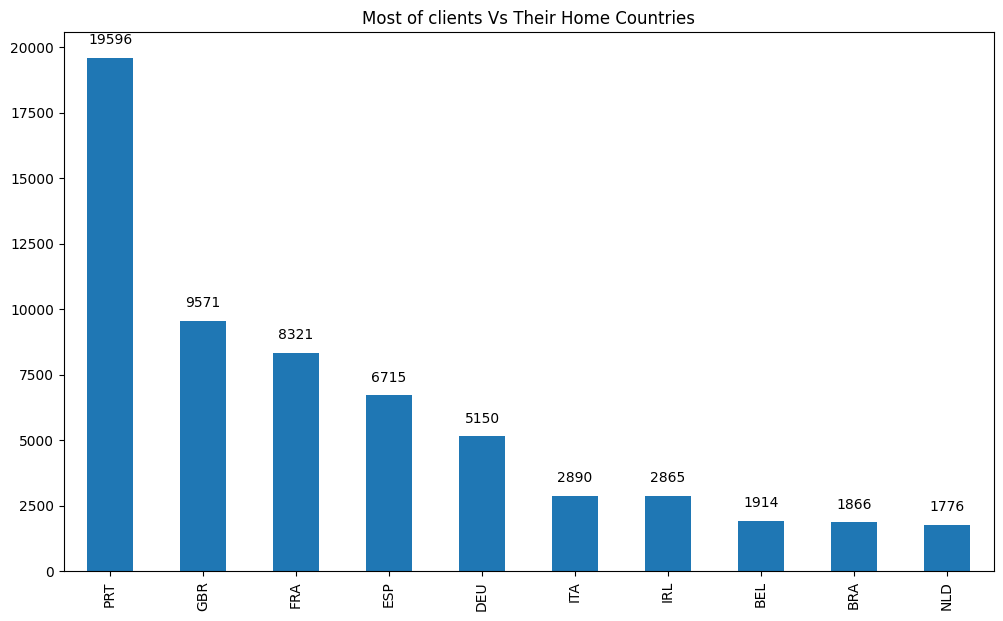

In [44]:
plt.figure(figsize=(12,7))
temp['country'].value_counts()[:10].plot(kind='bar')
y_coordinates = temp['country'].value_counts().values[0:10]
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Most of clients Vs Their Home Countries')
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart to understand from which country we got our most of clients.

##### 2. What is/are the insight(s) found from the chart?

We can see in above bar chart that our most of clients are from Portugal(PRT),
  Great Britain(GBR),France(FRA),Spain(ESP),Germany(DEU),Italy(ITA),Ireland(IRL),Belgium(BEL),Brazil(BRA),Netherlands(NLD)



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It has a neutral effect on our business. Good thing is we attract many people from European countries. But we have to focus on reaching to more clients outside europe.

#### Chart - 4

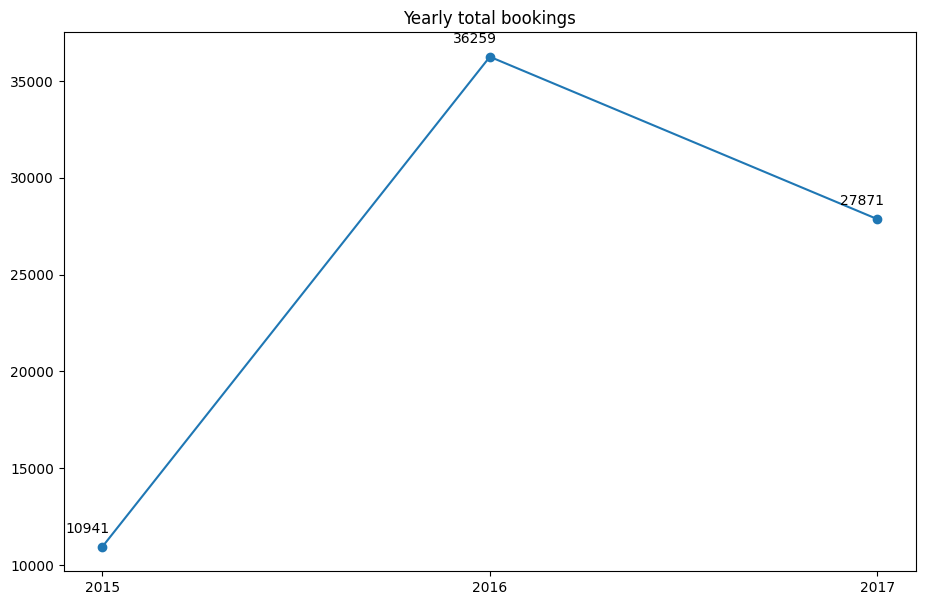

In [45]:
# Chart - 4 visualization code
plt.figure(figsize=(11,7))
temp['arrival_date_year'].value_counts().sort_index().plot(marker='o')
plt.xticks([2015,2016,2017]) 

x_coordinates = [2015,2016,2017]
y_coordinates = temp['arrival_date_year'].value_counts().sort_index().values

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='right') # horizontal alignment can be left, right or center

plt.title('Yearly total bookings')
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart to understand the number of bookings we get yearwise.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see that number of bookings icreased from 2015(**10941**) to 2016(**36259**).But bookings got decreased in 2017(27871)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Clearly this scenario lead us to negative growth as our number of bookings are going down yearly.

#### Chart - 5

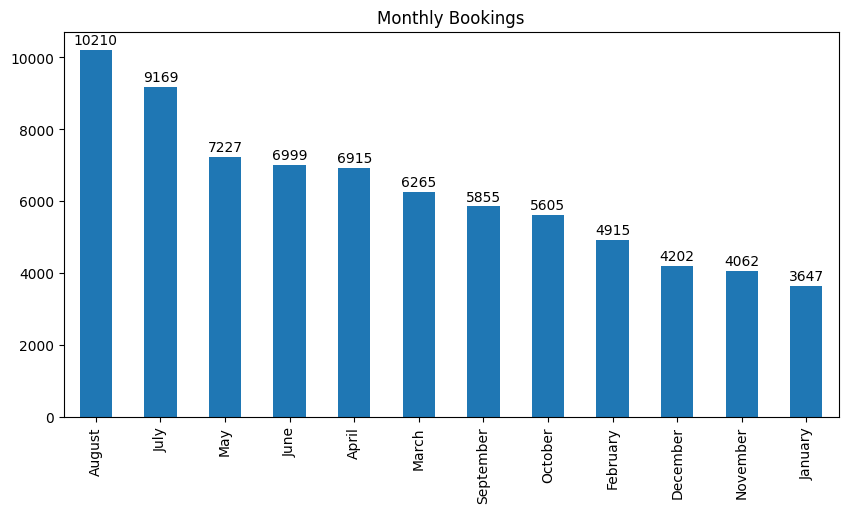

In [46]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
temp['arrival_date_month'].value_counts().plot(kind='bar')

x_coordinates = [i for i in range(12)]
y_coordinates = temp['arrival_date_month'].value_counts().values

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("Monthly Bookings")
plt.show()

##### 1. Why did you pick the specific chart?

I pick above chart to understand busiest month in the year and quietest month in the year.

##### 2. What is/are the insight(s) found from the chart?

From above bar chart we can see that August(**10210**) is the busiest month in the year and January(**3647**) is the quietest time in the year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see the difference between busiest month and quietest month is **10210-3647 = 6563**. we have to focus on more marketing,giving coupon codes during quietest time(**November-February**).

#### Chart - 6

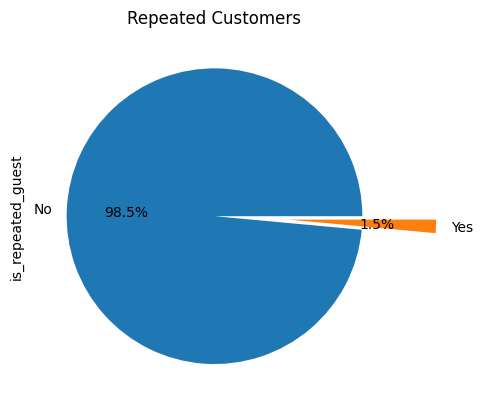

In [27]:
# Chart - 6 visualization code
temp['is_repeated_guest'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.5],labels=['No','Yes'],title='Repeated Customers')
plt.show()

##### 1. Why did you pick the specific chart?

I pick above pie chart to understand whether our clients are repeated or not.

##### 2. What is/are the insight(s) found from the chart?

From above pie chart we can see only **1.5%** of clients are repeated clients. **98.5%** clients are new.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will lead to negative growth. We have to value our old clients for growth and more client engagements. We can implement promo code, discount coupons, customer feedback systems etc. 

#### Chart - 7

<Figure size 1000x700 with 0 Axes>

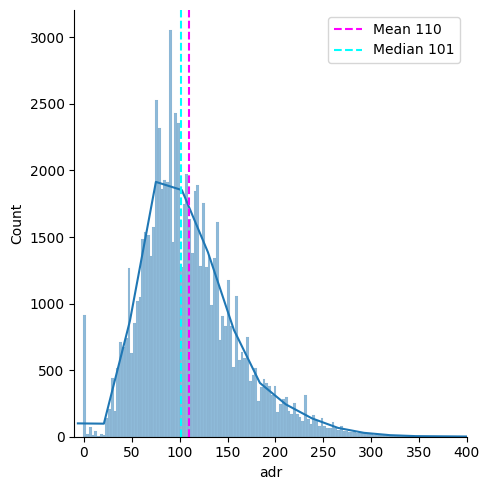

In [28]:
# Chart - 7 visualization code
plt.figure(figsize=(10,7))
sns.displot(temp['adr'],kde=True)
plt.xlim([-10,400])
plt.axvline(temp['adr'].mean(),color='magenta',linestyle='dashed',label='Mean {}'.format(int(temp['adr'].mean())))
plt.axvline(temp['adr'].median(),color='cyan',linestyle='dashed',label='Median {}'.format(int(temp['adr'].median())))
plt.tight_layout()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I pick above chart to understand the distribution of **ADR(Average Daily Rate)**. **ADR** deals with the average rental revenue per occupied room at a given time. 

##### 2. What is/are the insight(s) found from the chart?

From above distribution plot we can see our **Mean ADR** is **110** and **Median ADR** is 101 .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Low ADR rooms are may lead to loss in revenue. We have to go focus on growing revenue.

#### Chart - 8

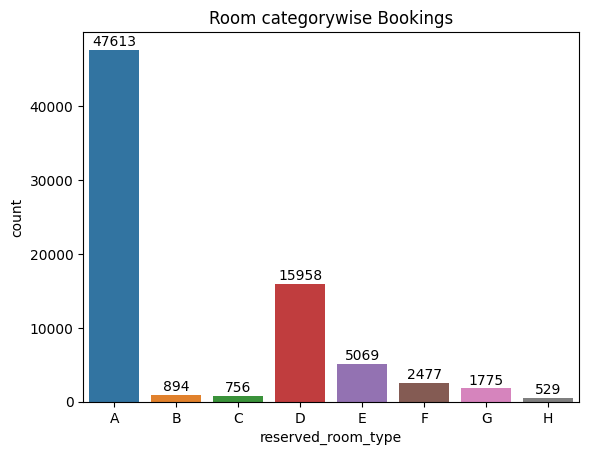

In [47]:
# Chart - 8 visualization code
sns.countplot(data = temp,x='reserved_room_type',order=temp['reserved_room_type'].value_counts().sort_index().keys())

x_coordinates = [i for i in range(8)]
y_coordinates = temp['reserved_room_type'].value_counts().sort_index().values

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center'''

plt.title("Room categorywise Bookings")
plt.show()

##### 1. Why did you pick the specific chart?

I pick above chart to understand what kind of rooms our clients prefer.

##### 2. What is/are the insight(s) found from the chart?

From above countplot we can see **A Category rooms(47163)** are in demand. On the other hand **H category rooms(529)** are less preferred by clients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As a result of above counplot we can say H category rooms are not preferrable by clients. It may lead business to negative growth in long period.

#### Chart - 9

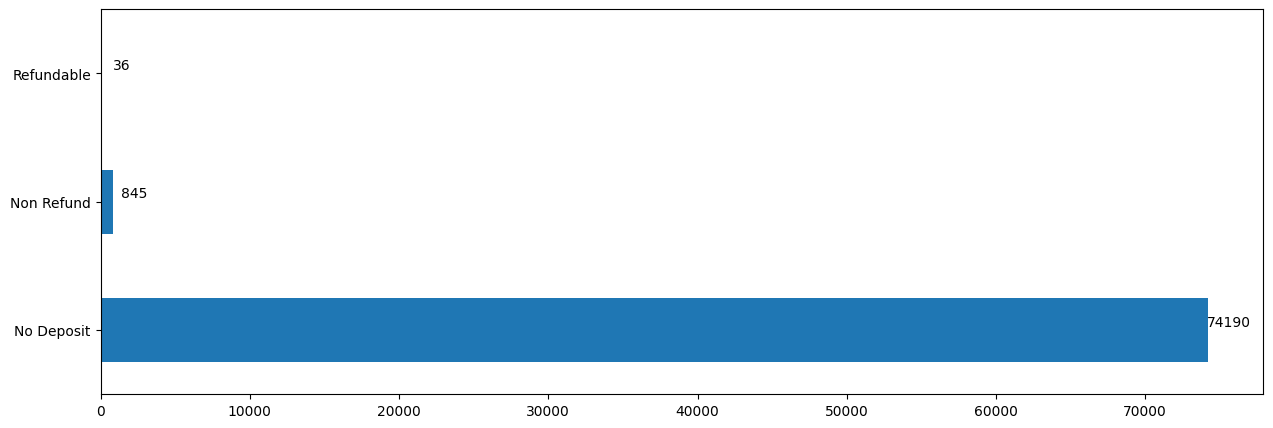

In [30]:
# Chart - 9 visualization code
plt.figure(figsize=(15,5))
temp['deposit_type'].value_counts().plot(kind='barh')

y_coordinates = [i for i in range(8)]
x_coordinates = temp['deposit_type'].value_counts().sort_index().values

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(x)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center'''

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above barplot to understand whether our clients prefer No Deposit , Non Refund, Refundable type of rooms

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see clients prefer **No Deposit(74190)** . On the other hand **Refundable(36)** type of transactions are not preferable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No Deposit bookings are cancellation prone. So it can lead to negative growth.

#### Chart - 10

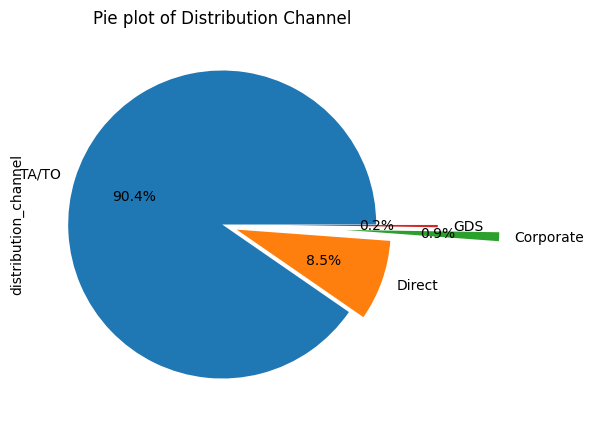

In [31]:
# Chart - 10 visualization code
plt.figure(figsize=(5,5))
temp['distribution_channel'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1,0.8,0.4],title='Pie plot of Distribution Channel')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the distribution of Channel by which we can connect to more clients.

##### 2. What is/are the insight(s) found from the chart?

From above pie plot we can see majority of clients are came through **Travel Agencies(TA)(90.4%)**. **GDS** is less preferable**(0.2%)**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As TA/TO takes their profits as a middle man. It will decrease hotel's revenue.

#### Chart - 11

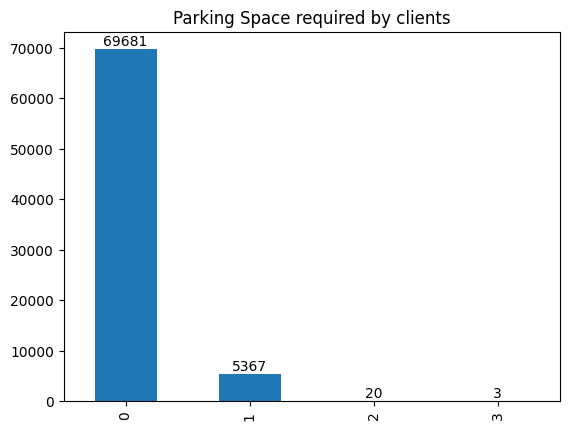

In [48]:
# Chart - 11 visualization code
temp['required_car_parking_spaces'].value_counts().plot(kind='bar')

x_coordinates = [i for i in range(4)]
y_coordinates = temp['required_car_parking_spaces'].value_counts().sort_index().values

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center'''
plt.title("Parking Space required by clients")
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above plot to understand whether clients want car parkings or not.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can say clients dont want car parkings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Car parkings are not necessary for now. But for more client engagements we may need to improve car parking services.

#### Chart - 12

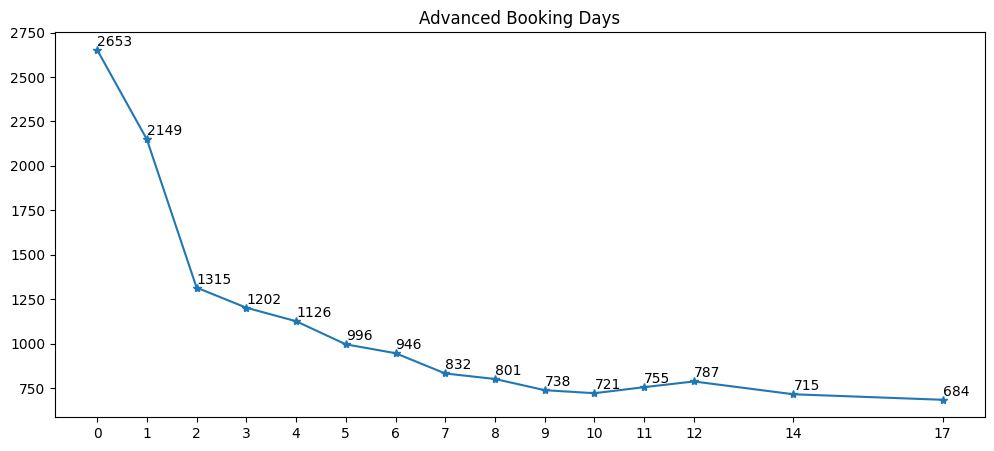

In [49]:
# Chart - 12 visualization code
plt.figure(figsize=(12,5))
#temp['lead_time'].value_counts().sort_values(ascending=False)[:15].plot(marker='*')
temp['lead_time'].value_counts().sort_values(ascending=False)[:15].sort_index().plot(marker='*')
plt.xticks(temp['lead_time'].value_counts().sort_values(ascending=False)[:15].sort_index().keys())

x_coordinates = temp['lead_time'].value_counts().sort_values(ascending=False)[:15].sort_index().keys()
y_coordinates = temp['lead_time'].value_counts().sort_values(ascending=False)[:15].sort_index().values

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center'''

plt.title('Advanced Booking Days')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above graph to understand the advance booking of clients.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see that most of clients done **instant bookings(2653)**. Very less bookings are done outside 15 days .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Advancement on booking may be cancellation prone. Instant bookings are not that much cancellation prone. We may give some vacation offers for better revenue.

#### Chart - 13

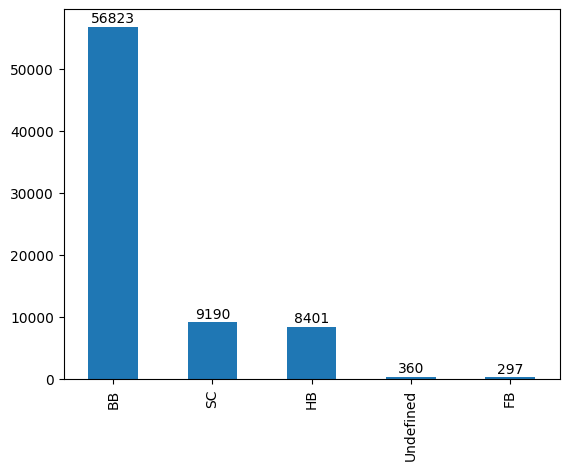

In [34]:
# Chart - 13 visualization code
temp['meal'].value_counts().plot(kind='bar')

x_coordinates = [i for i in range(5)]
y_coordinates = temp['meal'].value_counts().values

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand meal preference of clients.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can say that most of the clients prefer **Bread and Breakfast(BB)(56823)**. **Full Board(297)** is less preferable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As food/meal will give a major source of profit. clients are less interested in meals. soo we can say it will lead to negative growth.

#### Chart - 14 - Correlation Heatmap

<ipython-input-35-045d2b8caa5d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = temp.corr()


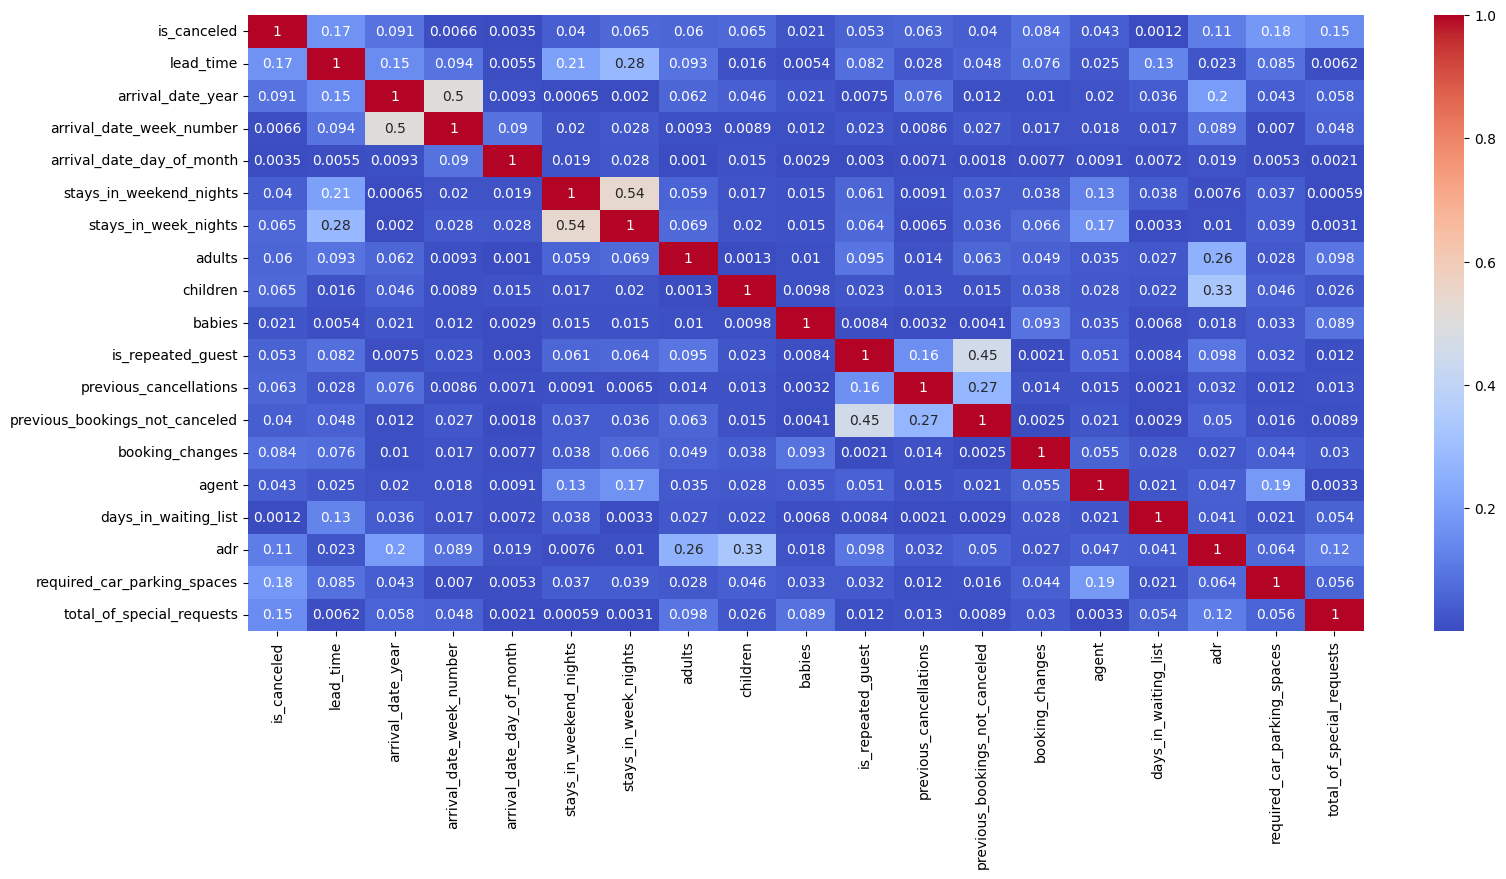

In [35]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,8))
corr_matrix = temp.corr()
sns.heatmap(abs(corr_matrix),annot=True,cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above heatmap to check multi-colinearity in our dataframe.

##### 2. What is/are the insight(s) found from the chart?

From above correlation heatmap we can see that there is no such collinearity between independent variables. We can use those variables to predict dependent variables in future.

#### Chart - 15 - Pair Plot 

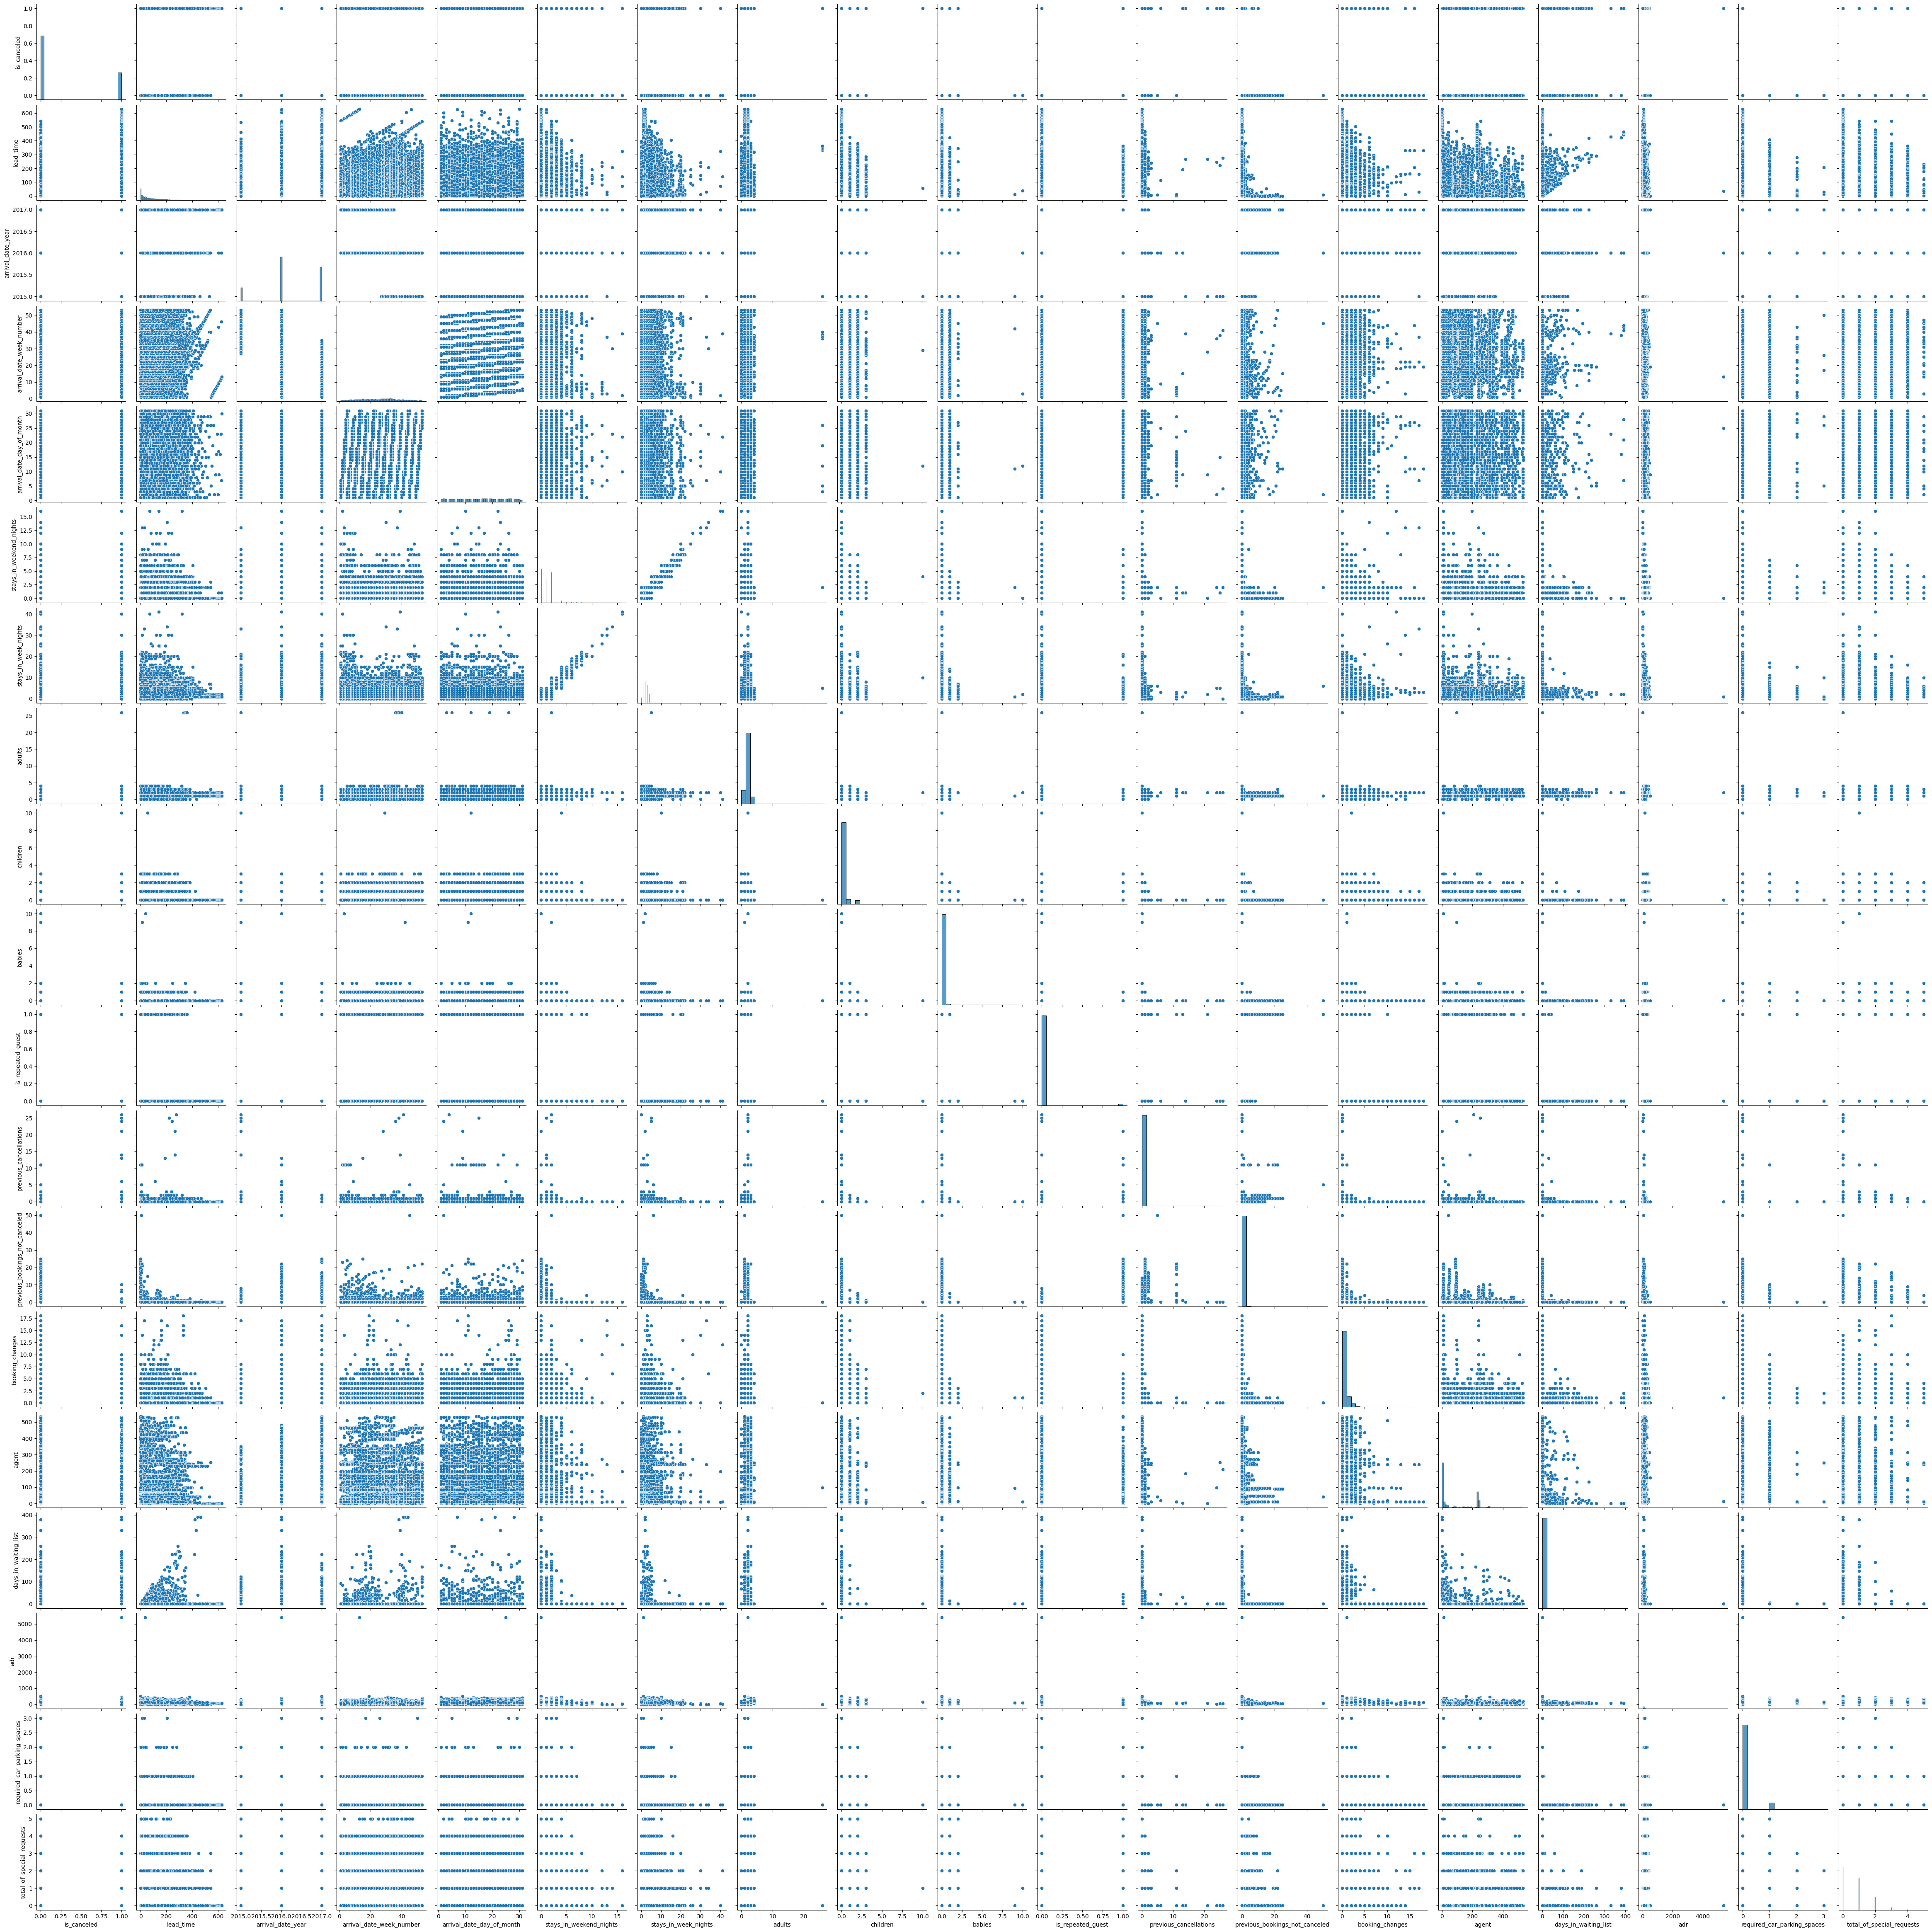

In [36]:
# Pair Plot visualization code
sns.pairplot(temp)
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above pairplot to plot pairwise relationships between variables within a dataset.

##### 2. What is/are the insight(s) found from the chart?

We can see that most of our variables are categorical and independent. There is no such strong poitive or negative co-linearity in it.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

I will suggest some points to improve :

1.   Stays in weekdays are higher than stays in weekends.We have to give promocode/discount code for bookings in weekend days. 
2.   City hotel has more cancellation rate **(31.8%)** . We have to give some effort on improvemnet in infrastructure,customer feedback forms etc.
3.   Most of our clients are from portuguese and European countries. We can use better markeing strategy to attract outside European clients.
4.   We got a downfall in bookings in 2017. So we need to focus on more bookings.
5.   In winter months(November,December,January) bookings are least. So,we can give clients winter offers.
6.   Only 1.5% of our clients are repeated. So we have to value our old clients.We can give them vouchers.
7.   ADR(Average Daily Rate) is low for some rooms. We can rennovate them to increase ADR(Average Daily Rate).
8.   'H' category rooms are less booked by clients. We can give special discounts on 'H' category rooms or rennovate rooms to get good value.
9.   Most of clients prefer 'No Deposit' Bookings which are more cancellation prone.
10.  We only get 0.2% of our clients from GDS distribution channel.A global distribution system (GDS) is a computerised network system owned or operated by a company that enables transactions between travel industry service providers, mainly airlines, hotels, car rental companies, and travel agencies.
11.  Most of clients donot need parking space . But we can attract corporate through good parking areas.
12.  Most clients doing instant bookings. We can give vacation vouchers to improve advanced bookings rate.
13.  Most of clients prefer bed and breakfast. We can give them special coupons on meals.As food/meal will give a major source of profit. clients are less interested in meals.


# **Conclusion**

As for future work, something that I would really like to work on this the app itself. With more data, I would love to make the app more dynamic and useful. I would like the app to show a rigorous analysis of all their bookings and make recommendations. Furthermore, I would like to research more into the effect of length of stays, advance purchase requirement, and overbooking on cancellations and incorporate this information in the app as well.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***